<a href="https://colab.research.google.com/github/solomon54/Unsupervised-Machine-Learning-Clustering-/blob/main/Clusturing_and_Dimensionaliyty_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [3]:
import pandas as pd
ur=("https://raw.githubusercontent.com/softwareWCU/Customer-segmentation-on-Netflix-Users-Dataset/main/Netflix%20Users%20Dataset.csv")
df=pd.read_csv(ur)
df.head()

,User_ID,Name,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre,Last_Login
0,1,James Martinez,18,France,Premium,80.26,Drama,2024-05-12
1,2,John Miller,23,USA,Premium,321.75,Sci-Fi,2025-02-05
2,3,Emma Davis,60,UK,Basic,35.89,Comedy,2025-01-24
3,4,Emma Miller,44,USA,Premium,261.56,Documentary,2024-03-25
4,5,Jane Smith,68,USA,Standard,909.30,Drama,2025-01-14


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   User_ID            25000 non-null  int64  
 1   Name               25000 non-null  object 
 2   Age                25000 non-null  int64  
 3   Country            25000 non-null  object 
 4   Subscription_Type  25000 non-null  object 
 5   Watch_Time_Hours   25000 non-null  float64
 6   Favorite_Genre     25000 non-null  object 
 7   Last_Login         25000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.5+ MB


In [5]:
df.describe()

,User_ID,Age,Watch_Time_Hours
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,46.482880,500.468858
std,7217.022701,19.594861,286.381815
min,1.000000,13.000000,0.120000
25%,6250.750000,29.000000,256.567500
50%,12500.500000,46.000000,501.505000
75%,18750.250000,63.000000,745.732500
max,25000.000000,80.000000,999.990000


In [6]:
df=df.drop(columns=['User_ID','Name'])
df.head()

,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre,Last_Login
0,18,France,Premium,80.26,Drama,2024-05-12
1,23,USA,Premium,321.75,Sci-Fi,2025-02-05
2,60,UK,Basic,35.89,Comedy,2025-01-24
3,44,USA,Premium,261.56,Documentary,2024-03-25
4,68,USA,Standard,909.30,Drama,2025-01-14


In [8]:
from sklearn.preprocessing import OrdinalEncoder

In [9]:
orEncoder=OrdinalEncoder(categories=[['Basic','Standard','Premium']])
# The 'Subscription_Type' column no longer exists, as it was transformed in previous steps.
# df['Subscription_Type'] = orEncoder.fit_transform(df[['Subscription_Type']])
df.head()

,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre,Last_Login
0,18,France,Premium,80.26,Drama,2024-05-12
1,23,USA,Premium,321.75,Sci-Fi,2025-02-05
2,60,UK,Basic,35.89,Comedy,2025-01-24
3,44,USA,Premium,261.56,Documentary,2024-03-25
4,68,USA,Standard,909.30,Drama,2025-01-14


In [10]:
df["Subscritpion_Type"]=orEncoder.fit_transform(df[["Subscription_Type"]])
df.head()

,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre,Last_Login,Subscritpion_Type
0,18,France,Premium,80.26,Drama,2024-05-12,2.0
1,23,USA,Premium,321.75,Sci-Fi,2025-02-05,2.0
2,60,UK,Basic,35.89,Comedy,2025-01-24,0.0
3,44,USA,Premium,261.56,Documentary,2024-03-25,2.0
4,68,USA,Standard,909.30,Drama,2025-01-14,1.0


In [11]:

df.head()

,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre,Last_Login,Subscritpion_Type
0,18,France,Premium,80.26,Drama,2024-05-12,2.0
1,23,USA,Premium,321.75,Sci-Fi,2025-02-05,2.0
2,60,UK,Basic,35.89,Comedy,2025-01-24,0.0
3,44,USA,Premium,261.56,Documentary,2024-03-25,2.0
4,68,USA,Standard,909.30,Drama,2025-01-14,1.0


In [12]:
df['Last_Login'] = pd.to_datetime(df['Last_Login'])
df.head()

,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre,Last_Login,Subscritpion_Type
0,18,France,Premium,80.26,Drama,2024-05-12,2.0
1,23,USA,Premium,321.75,Sci-Fi,2025-02-05,2.0
2,60,UK,Basic,35.89,Comedy,2025-01-24,0.0
3,44,USA,Premium,261.56,Documentary,2024-03-25,2.0
4,68,USA,Standard,909.30,Drama,2025-01-14,1.0


# to gate todays date

In [13]:
to_date=pd.to_datetime('today')
to_date

Timestamp('2025-12-25 21:08:57.123075')

In [14]:
df['days_Last_Login']=(to_date-pd.to_datetime(df['Last_Login'])).dt.days
df.head()

,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre,Last_Login,Subscritpion_Type,days_Last_Login
0,18,France,Premium,80.26,Drama,2024-05-12,2.0,592
1,23,USA,Premium,321.75,Sci-Fi,2025-02-05,2.0,323
2,60,UK,Basic,35.89,Comedy,2025-01-24,0.0,335
3,44,USA,Premium,261.56,Documentary,2024-03-25,2.0,640
4,68,USA,Standard,909.30,Drama,2025-01-14,1.0,345


In [15]:
df=df.drop(columns=['Last_Login'])
df.head()

,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre,Subscritpion_Type,days_Last_Login
0,18,France,Premium,80.26,Drama,2.0,592
1,23,USA,Premium,321.75,Sci-Fi,2.0,323
2,60,UK,Basic,35.89,Comedy,0.0,335
3,44,USA,Premium,261.56,Documentary,2.0,640
4,68,USA,Standard,909.30,Drama,1.0,345


## Scaling

In [16]:
from sklearn.preprocessing import StandardScaler

In [19]:
scale=StandardScaler()
df[['Age','Watch_Time_Hours',"days_Last_Login"]]=scale.fit_transform(df[['Age','Watch_Time_Hours',"days_Last_Login"]])
df.head()

,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre,Subscritpion_Type,days_Last_Login
0,-1.453618,France,Premium,-1.467332,Drama,2.0,1.116001
1,-1.198444,USA,Premium,-0.624070,Sci-Fi,2.0,-1.424741
2,0.689844,UK,Basic,-1.622268,Comedy,0.0,-1.311400
3,-0.126713,USA,Premium,-0.834249,Documentary,2.0,1.569368
4,1.098122,USA,Standard,1.427602,Drama,1.0,-1.216948


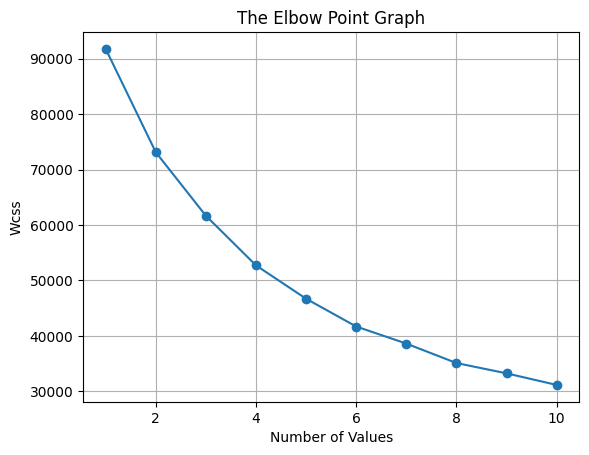

In [25]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Wcss=[]

# Drop the non-numeric columns before fitting KMeans
df_numeric = df.drop(columns=['Country', 'Subscription_Type', 'Favorite_Genre'])

for k in range(1,11):
  KMeansSE=KMeans(n_clusters=k, random_state=42, n_init='auto')
  KMeansSE.fit(df_numeric)
  Wcss.append(KMeansSE.inertia_)

plt.plot(range(1,11),Wcss, marker='o' )
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Values')
plt.ylabel('Wcss')
plt.grid()
plt.show()

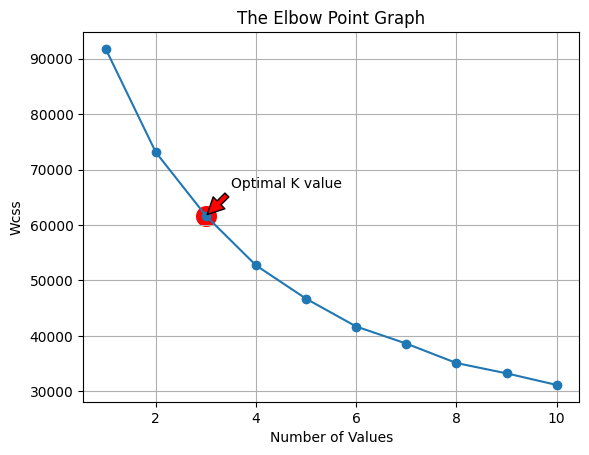

In [28]:
plt.plot(range(1,11),Wcss, marker='o' )
plt.scatter(3, Wcss[2], color='red', s=200)
plt.annotate("Optimal K value", xy=(3, Wcss[2]), xytext=(3 + 0.5, Wcss[2] + 5000), arrowprops=dict(facecolor='red', shrink=0.05))
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Values')
plt.ylabel('Wcss')
plt.grid()
plt.show()

## For reasearch pourpose

In [22]:
!pip install kneed

In [26]:
# from sklearn.knee import KneeLocator
from kneed import KneeLocator
nl = KneeLocator(range(1,11), Wcss, curve='convex', direction='decreasing')
print("Kvalue:",nl.knee)

Kvalue: 4


In [31]:
kmeansModel= KMeans(n_clusters=4, random_state=42, n_init='auto')
clusture= kmeansModel.fit_predict(df_numeric)
df['cluster']=clusture

In [36]:
from sklearn import metrics
from sklearn.metrics import silhouette_score
metricsClusture=silhouette_score(df_numeric, clusture)
metricsClusture

np.float64(0.20668450013947445)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

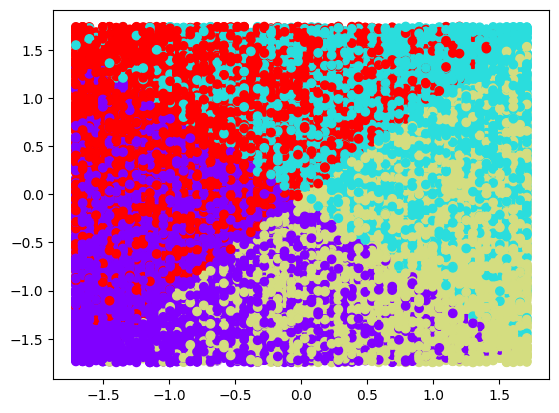

In [40]:
plt.scatter(df['Age'], df['Watch_Time_Hours'], c=clusture, cmap='rainbow')
plt

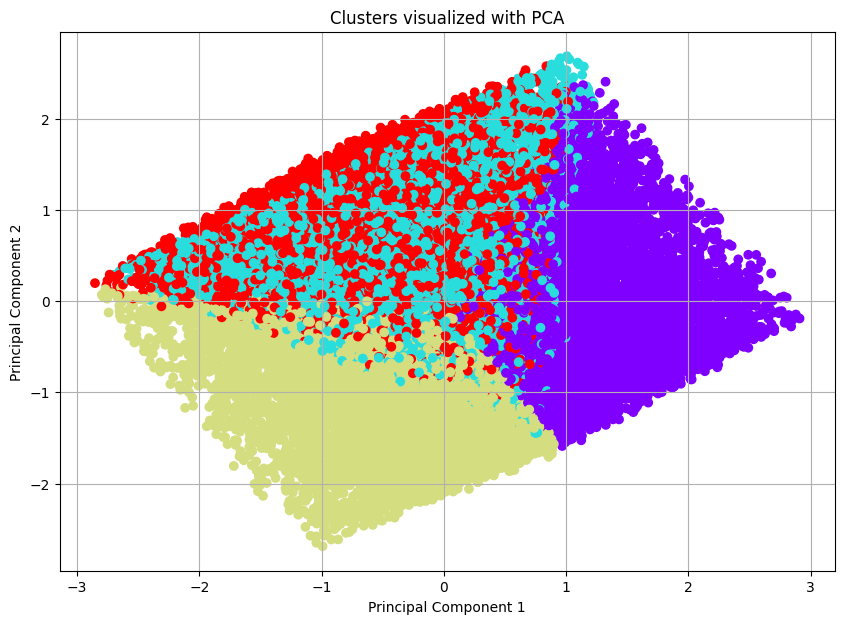

In [37]:
plt.figure(figsize=(10, 7))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusture, cmap='rainbow')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters visualized with PCA')
plt.grid(True)
plt.show()

In [35]:
from sklearn.decomposition import PCA
Dr = PCA(n_components=0.95)
df_pca = Dr.fit_transform(df_numeric)
df_pca

array([[ 2.32614   , -0.24499514, -0.25810389,  0.98503007],
       [ 0.19215399, -0.45348029, -1.88032252,  1.03622586],
       [-0.33651605, -2.07896915, -0.6406208 , -0.99264335],
       ...,
       [ 1.04497603,  0.17171527, -1.4084704 ,  1.02144198],
       [-0.9749064 , -0.05628889,  0.94376105, -1.01518476],
       [ 2.22942734,  0.1946487 ,  0.01810113,  0.98128264]])